In [55]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import datetime
import re

In [56]:
datetime.datetime.strptime('7-01-2015', "%d-%m-%Y")

datetime.datetime(2015, 1, 7, 0, 0)

### Cases excel table converting to pandas dataframe

In [57]:
city = 'chelyabinsk'
excel_file_cases = pd.read_excel('../../../data/' + city + '/cases.xlsx')
cases_table_from_dict_to_excel = {'date': 'Дата',
                    'sars_total_cases': 'Всего_орви', 
                    'sars_cases_age_group_0': '0 - 2_орви',
                    'sars_cases_age_group_1': '3 - 6_орви',
                    'sars_cases_age_group_2': '7 - 14_орви',
                    'sars_cases_age_group_3': '15 и ст._орви',
                    'total_population': 'Всего',
                    'population_age_group_0': '0 - 2',
                    'population_age_group_1': '3 - 6',
                    'population_age_group_2': '7 - 14',
                    'population_age_group_3': '15 и ст.',
                    }
cases_table_from_excel_to_dict = {key: value for value, key in cases_table_from_dict_to_excel.items()}
cases_df = pd.DataFrame(columns=cases_table_from_dict_to_excel.keys())
for col_name in cases_df.columns:
    cases_df[col_name] = excel_file_cases[cases_table_from_dict_to_excel[col_name]]

In [60]:
def date_extract(input_string):
    matching = re.search(r'(\d{2}\.\d{2}\.\d{4})', input_string)
    if matching:
        date_string = matching.group(1)
        date_object = datetime.datetime.strptime(date_string, "%d.%m.%Y")
        return date_object
    else:
        raise Exception("Incorrect date format!")  

cases_df['datetime'] = cases_df['date'].apply(date_extract)
cases_df = cases_df.fillna(float('nan'))
cases_df.head()

,date,sars_total_cases,sars_cases_age_group_0,sars_cases_age_group_1,sars_cases_age_group_2,sars_cases_age_group_3,total_population,population_age_group_0,population_age_group_1,population_age_group_2,population_age_group_3,datetime
0,2010.1 (04.01.2010 - 10.01.2010),5402,1694,1001,459,2248,1093700,39265,47824,83345,923266,2010-01-04
1,2010.2 (11.01.2010 - 17.01.2010),8287,2121,1505,1202,3459,1093700,39265,47824,83345,923266,2010-01-11
2,2010.3 (18.01.2010 - 24.01.2010),8658,2010,1807,1314,3527,1093700,39265,47824,83345,923266,2010-01-18
3,2010.4 (25.01.2010 - 31.01.2010),8985,2208,1935,1390,3452,1093700,39265,47824,83345,923266,2010-01-25
4,2010.5 (01.02.2010 - 07.02.2010),9022,2101,2004,1487,3430,1093700,39265,47824,83345,923266,2010-02-01


In [61]:
cases_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774 entries, 0 to 773
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    774 non-null    object        
 1   sars_total_cases        774 non-null    int64         
 2   sars_cases_age_group_0  774 non-null    int64         
 3   sars_cases_age_group_1  774 non-null    int64         
 4   sars_cases_age_group_2  774 non-null    int64         
 5   sars_cases_age_group_3  774 non-null    int64         
 6   total_population        774 non-null    int64         
 7   population_age_group_0  774 non-null    int64         
 8   population_age_group_1  774 non-null    int64         
 9   population_age_group_2  774 non-null    int64         
 10  population_age_group_3  774 non-null    int64         
 11  datetime                774 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(10), object(1)
memory 

### PCR excel table converting to pandas dataframe

In [41]:
excel_file_pcr = pd.read_excel('../../../data/' + city + '/pcr.xlsx')
pcr_table_from_excel_to_python = {'date': 'Дата',
                                  'tested_total': 'Число образцов тестированных на грипп',
                                  'tested_strain_0': 'A (субтип не определен)',
                                  'tested_strain_1': 'A(H1)pdm09',
                                  'tested_strain_2': 'A(H3)',
                                  'tested_strain_3': 'B'
                                  }
pcr_table_from_python_to_excel = {key: value for value, key in pcr_table_from_excel_to_python.items()}

In [42]:
pcr_df = pd.DataFrame(columns=pcr_table_from_excel_to_python.keys())
for col_name in pcr_df.columns:
    pcr_df[col_name] = excel_file_pcr[pcr_table_from_excel_to_python[col_name]]
pcr_df['datetime'] = pcr_df['date'].apply(date_extract)
pcr_df = pcr_df.fillna(float('nan'))

In [43]:
strains_number = 4
for strain_index in range(strains_number):
    str_ind = str(strain_index)
    cases_df['rel_strain_' + str_ind] = np.where(pcr_df['tested_total'] != 0, pcr_df['tested_strain_' + str_ind]/pcr_df['tested_total'], np.nan)
    cases_df['real_cases_strain_' + str_ind] = (cases_df['rel_strain_' + str_ind]*cases_df['sars_total_cases']).round()

In [44]:
cases_df

,date,sars_total_cases,sars_cases_age_group_0,sars_cases_age_group_1,sars_cases_age_group_2,sars_cases_age_group_3,total_population,population_age_group_0,population_age_group_1,population_age_group_2,population_age_group_3,datetime,rel_strain_0,real_cases_strain_0,rel_strain_1,real_cases_strain_1,rel_strain_2,real_cases_strain_2,rel_strain_3,real_cases_strain_3
0,2010.1 (04.01.2010 - 10.01.2010),5402,1694,1001,459,2248,1093700,39265,47824,83345,923266,2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010.2 (11.01.2010 - 17.01.2010),8287,2121,1505,1202,3459,1093700,39265,47824,83345,923266,2010-01-11,0.007246,60.0,0.043478,360.0,0.0,0.0,0.000000,0.0
2,2010.3 (18.01.2010 - 24.01.2010),8658,2010,1807,1314,3527,1093700,39265,47824,83345,923266,2010-01-18,0.030303,262.0,0.111111,962.0,0.0,0.0,0.040404,350.0
3,2010.4 (25.01.2010 - 31.01.2010),8985,2208,1935,1390,3452,1093700,39265,47824,83345,923266,2010-01-25,0.009346,84.0,0.018692,168.0,0.0,0.0,0.009346,84.0
4,2010.5 (01.02.2010 - 07.02.2010),9022,2101,2004,1487,3430,1093700,39265,47824,83345,923266,2010-02-01,0.012500,113.0,0.037500,338.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
769,2024.40 (30.09.2024 - 06.10.2024),13993,1533,2007,2918,7535,1177058,35448,51864,121878,967868,2024-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
770,2024.41 (07.10.2024 - 13.10.2024),12353,1437,2105,2783,6028,1177058,35448,51864,121878,967868,2024-10-07,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
771,2024.42 (14.10.2024 - 20.10.2024),11712,1311,1842,2562,5997,1177058,35448,51864,121878,967868,2024-10-14,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
772,2024.43 (21.10.2024 - 27.10.2024),10861,1257,1774,2350,5480,1177058,35448,51864,121878,967868,2024-10-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


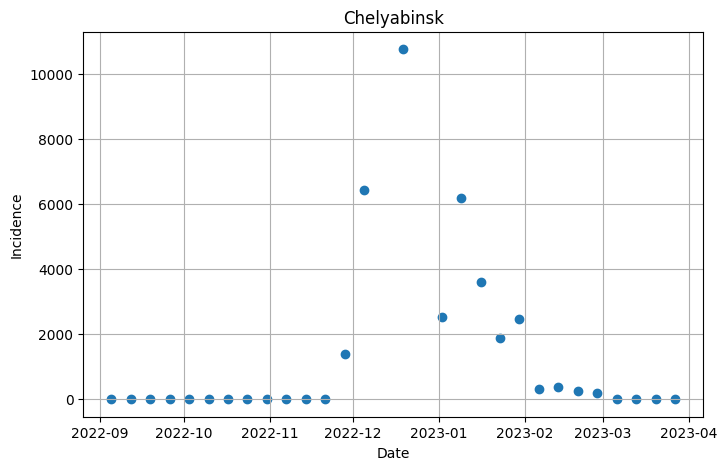

In [ ]:
strain_index = 1
start = pd.to_datetime('09-01-2022')
end = pd.to_datetime('04-01-2023')
start_recreation = pd.to_datetime('10-07-2023')
end_recreation = pd.to_datetime('01-01-2024')
plt.figure(figsize=(8,5))
plt.grid()
# plt.scatter(cases_df[(cases_df['datetime'] < end_recreation) & (cases_df['datetime'] > start_recreation)]['datetime'],
#              cases_df[(cases_df['datetime'] < end_recreation) & (cases_df['datetime'] > start_recreation)]['sars_total_cases']*0.05, 
#              color='red')
incidence_data = cases_df[(cases_df['datetime'] < end) & (cases_df['datetime'] > start)][f'real_cases_strain_{strain_index}']
datetime_data = cases_df[(cases_df['datetime'] < end) & (cases_df['datetime'] > start)]['datetime']
df_to_save = pd.DataFrame({'date': datetime_data, 'incidence': incidence_data})
plt.scatter(datetime_data, incidence_data)
# plt.legend(['Influenza cases recreated by overall ARI cases',
#             'Influenza cases calculated by PCR'])
plt.xlabel('Date')
plt.ylabel('Incidence')
plt.title(city.capitalize())
plt.savefig(f'{city}_wave_2022-2023.png', dpi=400)
strain_name = pcr_table_from_excel_to_python[f'tested_strain_{strain_index}']
df_to_save.to_csv(f'{city}_wave_2022-2023_strain_{strain_name}.csv')

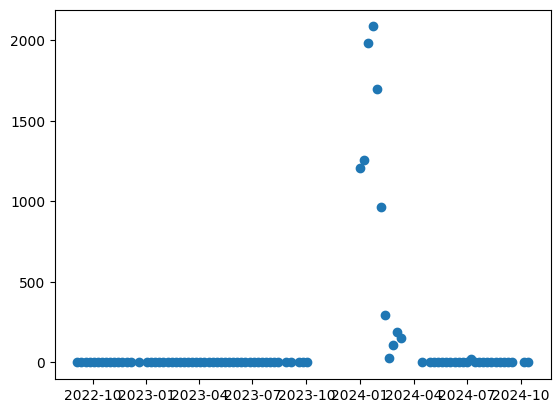

In [48]:
start = pd.to_datetime('09-01-2022')
end = pd.to_datetime('04-01-2025')
plt.scatter(cases_df[(cases_df['datetime'] < end) & (cases_df['datetime'] > start)]['datetime'],
    cases_df[(cases_df['datetime'] < end) & (cases_df['datetime'] > start)]['real_cases_strain_2'])

In [ ]:
pd.read_csv('chelyabinsk_wave_2022-2023_strain_A(H1)pdm09.csv', index_col=0)

AttributeError: 'DataFrame' object has no attribute 'to_list'

In [62]:
pcr_df[(pcr_df['datetime'] < end) & (pcr_df['datetime'] > start)]

,date,tested_total,tested_strain_0,tested_strain_1,tested_strain_2,tested_strain_3,datetime
709,2023.32 (07.08.2023 - 13.08.2023),43.0,0.0,0.0,0.0,0.0,2023-08-07
710,2023.33 (14.08.2023 - 20.08.2023),67.0,0.0,0.0,0.0,0.0,2023-08-14
711,2023.34 (21.08.2023 - 27.08.2023),99.0,0.0,0.0,0.0,0.0,2023-08-21
712,2023.35 (28.08.2023 - 03.09.2023),73.0,0.0,0.0,0.0,0.0,2023-08-28
713,2023.36 (04.09.2023 - 10.09.2023),66.0,0.0,0.0,0.0,0.0,2023-09-04
714,2023.37 (11.09.2023 - 17.09.2023),NaN,NaN,NaN,NaN,NaN,2023-09-11
715,2023.38 (18.09.2023 - 24.09.2023),61.0,0.0,0.0,0.0,0.0,2023-09-18
716,2023.39 (25.09.2023 - 01.10.2023),57.0,0.0,0.0,0.0,0.0,2023-09-25
717,2023.40 (02.10.2023 - 08.10.2023),NaN,NaN,NaN,NaN,NaN,2023-10-02
718,2023.41 (09.10.2023 - 15.10.2023),81.0,0.0,0.0,0.0,0.0,2023-10-09


In [55]:
cases_df[(cases_df['datetime'] < end) & (cases_df['datetime'] > start)]

,date,sars_total_cases,sars_cases_age_group_0,sars_cases_age_group_1,sars_cases_age_group_2,sars_cases_age_group_3,total_population,population_age_group_0,population_age_group_1,population_age_group_2,population_age_group_3,datetime,rel_strain_0,real_cases_strain_0,rel_strain_1,real_cases_strain_1,rel_strain_2,real_cases_strain_2,rel_strain_3,real_cases_strain_3
709,2023.32 (07.08.2023 - 13.08.2023),5055,818,1025,623,2589,1179288,37955,57543,133152,950638,2023-08-07,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
710,2023.33 (14.08.2023 - 20.08.2023),5104,838,1036,698,2532,1179288,37955,57543,133152,950638,2023-08-14,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
711,2023.34 (21.08.2023 - 27.08.2023),5562,911,1186,672,2793,1179288,37955,57543,133152,950638,2023-08-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
712,2023.35 (28.08.2023 - 03.09.2023),6317,934,1277,780,3326,1179288,37955,57543,133152,950638,2023-08-28,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
713,2023.36 (04.09.2023 - 10.09.2023),8707,1197,1541,1423,4546,1179288,37955,57543,133152,950638,2023-09-04,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
714,2023.37 (11.09.2023 - 17.09.2023),13817,1519,1982,3231,7085,1179288,37955,57543,133152,950638,2023-09-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
715,2023.38 (18.09.2023 - 24.09.2023),15134,1529,1967,3422,8216,1179288,37955,57543,133152,950638,2023-09-18,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
716,2023.39 (25.09.2023 - 01.10.2023),14127,1539,2064,2930,7594,1179288,37955,57543,133152,950638,2023-09-25,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
717,2023.40 (02.10.2023 - 08.10.2023),13356,1427,2038,2475,7416,1182517,36159,56353,119143,970862,2023-10-02,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
718,2023.41 (09.10.2023 - 15.10.2023),13170,1520,2107,2535,7008,1182517,36159,56353,119143,970862,2023-10-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
